Probability of meeting retirement income goals: 1.0


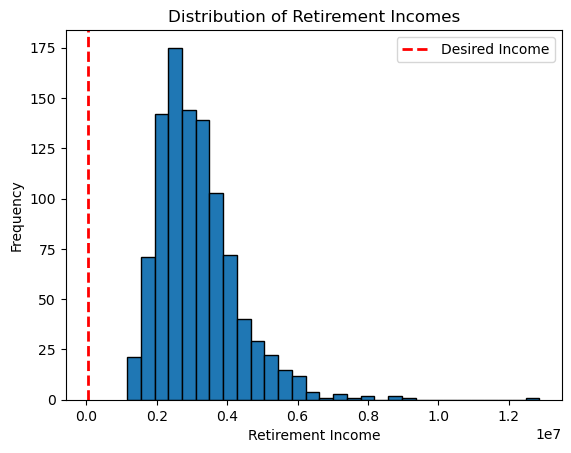

In [8]:
import pandas as pd
import numpy as np

np.random.seed(42)  # Setting a random seed for reproducibility

# Step 1: Define problem parameters
initial_portfolio_value = 1000000  # Initial value of your investment portfolio
desired_income = 60000  # Desired annual retirement income
retirement_years = 30  # Number of years in retirement
num_simulations = 1000  # Number of simulation runs

# Step 2: Generate random samples for key variables
stock_returns = np.random.normal(0.08, 0.15, num_simulations)  # Assumed mean and standard deviation for stock returns
bond_returns = np.random.normal(0.04, 0.08, num_simulations)  # Assumed mean and standard deviation for bond returns
inflation_rates = np.random.normal(0.03, 0.02, num_simulations)  # Assumed mean and standard deviation for inflation rates
retirement_expenses = np.random.normal(50000, 10000, num_simulations)  # Assumed mean and standard deviation for retirement expenses

# Step 3: Create DataFrame to store the random samples
portfolio_data = pd.DataFrame({
    'StockReturns': stock_returns,
    'BondReturns': bond_returns,
    'InflationRates': inflation_rates,
    'RetirementExpenses': retirement_expenses
})

# Step 4: Save the DataFrame to a CSV file
portfolio_data.to_csv('portfolio.csv', index=False)

# Step 5: Perform simulations and calculate retirement income
retirement_incomes = np.zeros(num_simulations)
for i in range(num_simulations):
    portfolio_value = initial_portfolio_value
    annual_withdrawal = desired_income
    for year in range(retirement_years):
        portfolio_value *= (1 + stock_returns[i])  # Update portfolio value based on stock returns
        portfolio_value *= (1 + bond_returns[i])  # Update portfolio value based on bond returns
        portfolio_value -= annual_withdrawal  # Withdraw annual income
        annual_withdrawal *= (1 + inflation_rates[i])  # Adjust annual withdrawal for inflation
        retirement_incomes[i] += annual_withdrawal  # Accumulate retirement income

# Step 6: Estimate the probability of meeting retirement income goals
prob_meeting_goals = len(retirement_incomes[retirement_incomes >= desired_income]) / num_simulations
print("Probability of meeting retirement income goals:", prob_meeting_goals)

# Step 7: Visualize the distribution of retirement incomes
import matplotlib.pyplot as plt

plt.hist(retirement_incomes, bins=30, edgecolor='black')
plt.axvline(desired_income, color='red', linestyle='dashed', linewidth=2, label='Desired Income')
plt.xlabel('Retirement Income')
plt.ylabel('Frequency')
plt.title('Distribution of Retirement Incomes')
plt.legend()
plt.show()